# HOSPITAL DATABASE MANAGEMENT SYSTEM

### Abstract:

The Hospital Management System is a comprehensive software solution designed to automate and digitize the operations of a healthcare facility. The system includes modules for managing patient entries, doctor appointments, diagnosis and treatment records, patient admissions and discharges, and financial transactions.

The system consists of several interconnected tables that store relevant data, such as patient details, doctor information, departmental assignments, and medical procedures. It allows hospital staff to easily access and update patient records, schedule appointments, assign doctors to specific departments, and track medical treatments and procedures.

By centralizing and digitizing hospital operations, the system helps improve efficiency, reduce errors, and enhance patient care. It provides administrators with valuable insights into hospital performance, resource utilization, and financial management.

### Objective:

The objective of the Hospital Management System project is to create an efficient and organized system to manage various aspects of a hospital, including patient information, doctor schedules, departmental operations, and financial transactions. The system aims to streamline hospital processes, improve patient care, enhance communication between staff members, and facilitate accurate record-keeping for administrative purposes.

### Libraries Installing

In [21]:
# !pip install mysql-connector-python
# !pip install gapminder

### Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gapminder
from gapminder import gapminder
import sqlite3
import mysql.connector

### Establishing connection to database

In [8]:
mydb = mysql.connector.connect(host='localhost', 
                               port='3306', 
                               user='root', 
                               passwd='', 
                               db="HospitalManagementSystem", 
                               auth_plugin='mysql_native_password', 
                               buffered=True)
mycursor = mydb.cursor()

### Show Databases

In [35]:
mycursor.execute("SHOW DATABASES")
for x in mycursor:
    print(x)

('hospitalmanagementsystem',)
('information_schema',)
('mysql',)
('performance_schema',)
('phpmyadmin',)
('sra',)
('test',)


### Data View 

In [36]:
mycursor.execute("SHOW TABLES")

In [37]:
for x in mycursor:
    print(x)

('departments',)
('doctor_on_call',)
('doctors',)
('duty_doc',)
('patient_admit',)
('patient_diagnose',)
('patient_discharge',)
('patient_entry',)
('patient_operated',)
('patient_regular',)


### Data Cleaning

In [33]:
print("departments\n")
mycursor.execute("SELECT * FROM departments")
df = pd.DataFrame(mycursor.fetchall(), columns=mycursor.column_names)
null_values = df.isnull().sum()
print(null_values)

print("\n doctors\n")
mycursor.execute("SELECT * FROM doctors")
df = pd.DataFrame(mycursor.fetchall(), columns=mycursor.column_names)
null_values = df.isnull().sum()
print(null_values)

print("\n doctor_on_call\n")
mycursor.execute("SELECT * FROM doctor_on_call")
df = pd.DataFrame(mycursor.fetchall(), columns=mycursor.column_names)
null_values = df.isnull().sum()
print(null_values)

print("\n duty_doc\n")
mycursor.execute("SELECT * FROM duty_doc")
df = pd.DataFrame(mycursor.fetchall(), columns=mycursor.column_names)
null_values = df.isnull().sum()
print(null_values)

print("\n patient_admit \n")
mycursor.execute("SELECT * FROM patient_admit")
df = pd.DataFrame(mycursor.fetchall(), columns=mycursor.column_names)
null_values = df.isnull().sum()
print(null_values)

print("\n patient_diagnose\n")
mycursor.execute("SELECT * FROM patient_diagnose")
df = pd.DataFrame(mycursor.fetchall(), columns=mycursor.column_names)
null_values = df.isnull().sum()
print(null_values)

print("\n patient_discharge\n")
mycursor.execute("SELECT * FROM patient_discharge")
df = pd.DataFrame(mycursor.fetchall(), columns=mycursor.column_names)
null_values = df.isnull().sum()
print(null_values)

print("\n patient_entry\n")
mycursor.execute("SELECT * FROM patient_entry")
df = pd.DataFrame(mycursor.fetchall(), columns=mycursor.column_names)
null_values = df.isnull().sum()
print(null_values)

print("\n patient_operated\n")
mycursor.execute("SELECT * FROM patient_operated")
df = pd.DataFrame(mycursor.fetchall(), columns=mycursor.column_names)
null_values = df.isnull().sum()
print(null_values)


print("\n patient_regular\n")
mycursor.execute("SELECT * FROM patient_regular")
df = pd.DataFrame(mycursor.fetchall(), columns=mycursor.column_names)
null_values = df.isnull().sum()
print(null_values)

departments

DEPT_ID          0
DEPT_LOCATION    0
DEPT_NAME        0
dtype: int64

 doctors

DOC_ID            0
DOC_NAME          0
SPECIALIZATION    0
ADDRESS           0
PHONE_NO          0
DEPT_NO           0
dtype: int64

 doctor_on_call

DOC_ID         0
DOC_NAME       0
FEES_PER_CL    0
dtype: int64

 duty_doc

DOC_ID      0
DOC_NAME    0
SALARY      0
dtype: int64

 patient_admit 

PATIENT_ID       0
ADVANCE_PYMT     0
PAYMENT_MODE     0
DEPT_ID          0
ADMITTED_DATE    0
DIAGNOSIS        0
ROOM_NO          0
dtype: int64

 patient_diagnose

PATIENT_ID         0
DIAGNOSIS          0
TREATMENT_GIVEN    0
DOC_ID             0
DEPT_ID            0
dtype: int64

 patient_discharge

PATIENT_ID         0
DISCHARGE_DATE     0
TREATMENT_GIVEN    0
MEDICINE           0
PAYMENT_MODE       0
dtype: int64

 patient_entry

PATIENT_ID      0
PATIENT_NAME    0
AGE             0
SEX             0
PHONE_NO        0
CHECKUP_DATE    0
DEPT_ID         0
dtype: int64

 patient_operated

PATIENT

## Data Visualization

### What is the distribution of doctor specializations?

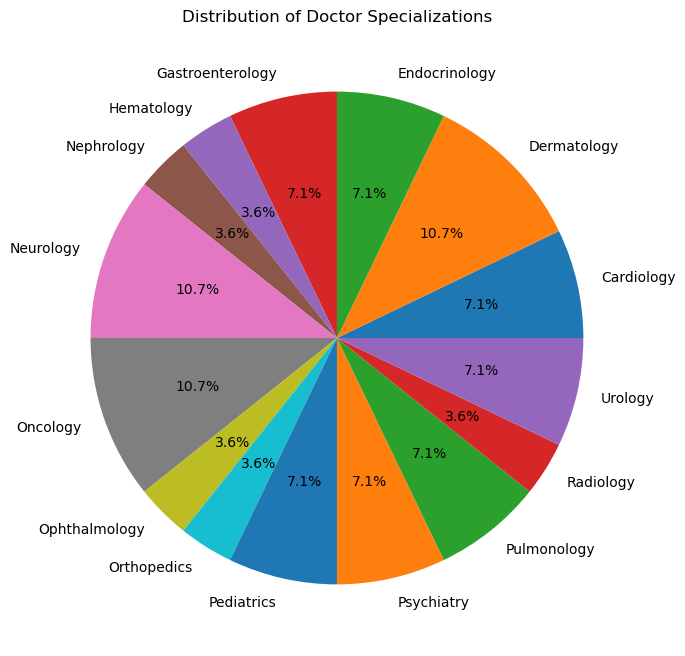

In [13]:
mycursor = mydb.cursor()
query1 = "SELECT SPECIALIZATION, COUNT(*) as COUNT FROM DOCTORS GROUP BY SPECIALIZATION"
mycursor.execute(query1)

# Fetch results
results1 = mycursor.fetchall()

# Create a pandas dataframe from the results
df1 = pd.DataFrame(results1, columns=["Specialization", "Count"])

# Create the pie chart using matplotlib
plt.figure(figsize=(10,8))
plt.title("Distribution of Doctor Specializations")
plt.pie(x=df1['Count'], labels=df1['Specialization'], autopct='%1.1f%%')
plt.show()

### What is the distribution of patient counts by department?

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


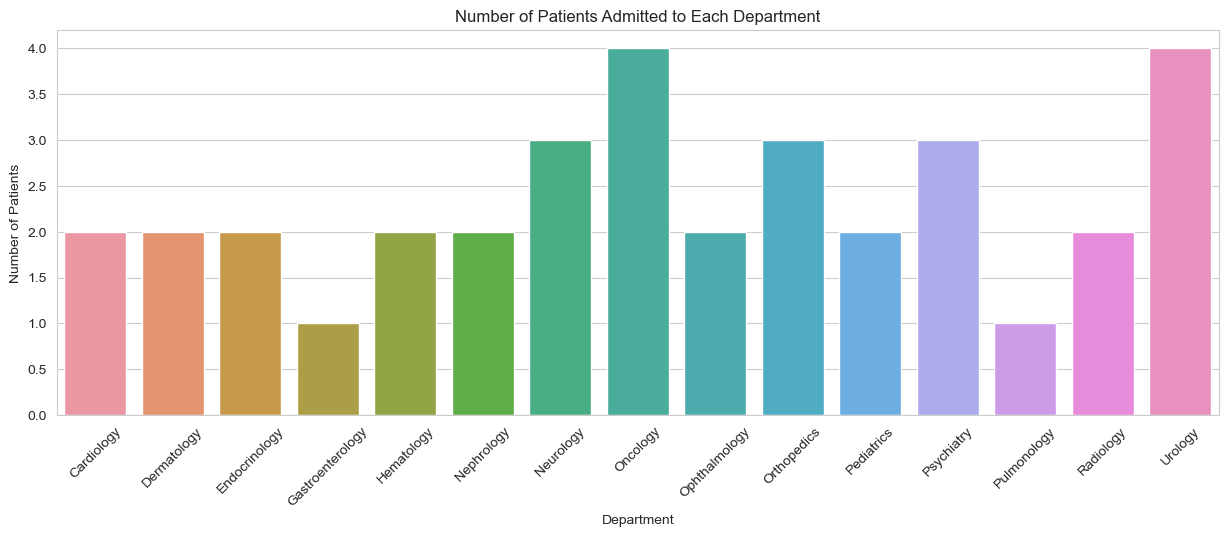

In [15]:
## Bar chart of patient count by department:

query2 = """
SELECT DEPT_NAME, 
COUNT(*) FROM PATIENT_ENTRY JOIN DEPARTMENTS 
ON PATIENT_ENTRY.DEPT_ID = DEPARTMENTS.DEPT_ID 
GROUP BY DEPT_NAME;
"""

# Creating dataframe from query result
df2 = pd.read_sql(query2, mydb)

# Creating bar chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(15, 5))
plt.title("Number of Patients Admitted to Each Department")
sns.barplot(x='DEPT_NAME', y='COUNT(*)', data=df2)
plt.xlabel("Department")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.show()


### What is the number of patients diagnosed by doctors in each specialization?

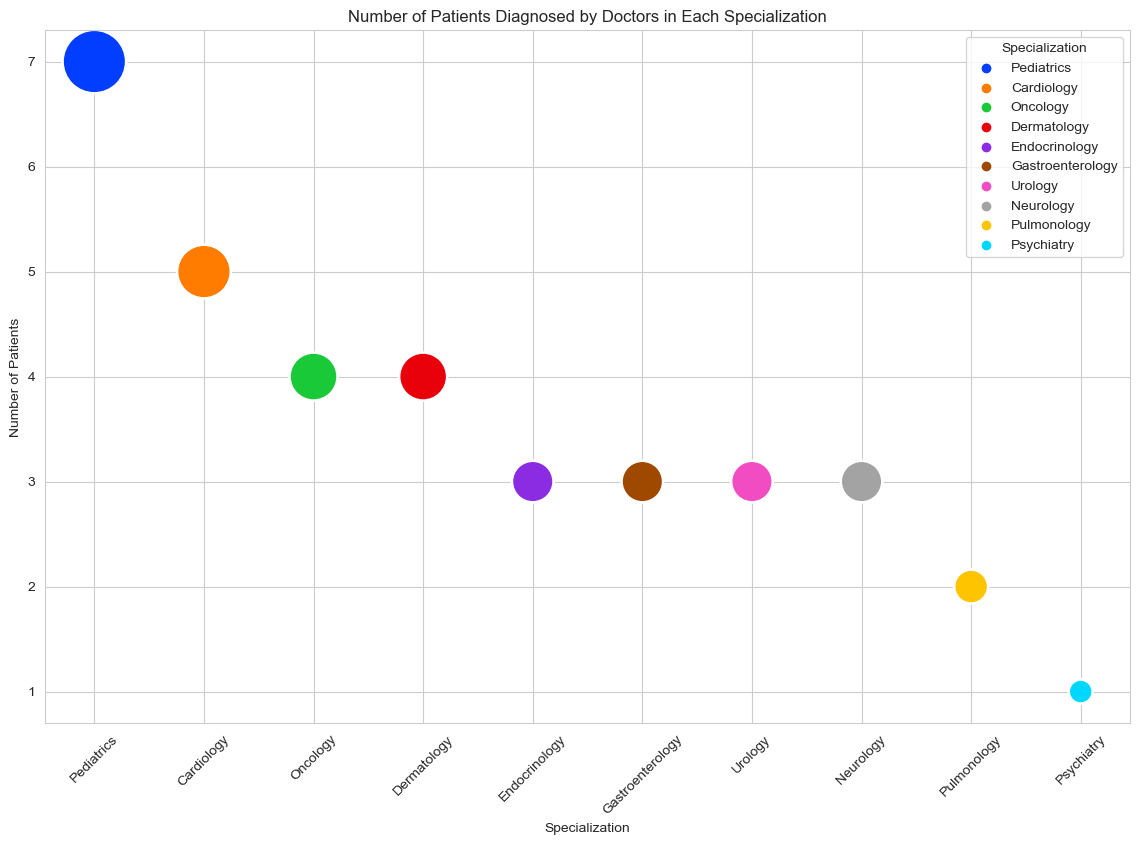

In [16]:
# Query to get number of patients diagnosed by doctors in each specialization
query3 = """
SELECT DOCTORS.SPECIALIZATION, 
COUNT(*) AS NUM_PATIENTS 
FROM PATIENT_DIAGNOSE JOIN DOCTORS 
ON PATIENT_DIAGNOSE.DOC_ID = DOCTORS.DOC_ID 
GROUP BY DOCTORS.SPECIALIZATION 
ORDER BY NUM_PATIENTS DESC
"""

# Executing query
mycursor.execute(query3)

# Fetching data
data3 = mycursor.fetchall()

# Converting data to pandas dataframe
df3 = pd.DataFrame(data3, columns=['Specialization', 'Num_Patients'])

# Creating scatter plot using seaborn
plt.figure(figsize=(14, 9))
sns.scatterplot(data=df3, 
                x="Specialization", 
                y="Num_Patients", 
                s=df3['Num_Patients']*300, 
                hue="Specialization", 
                palette="bright")
plt.title("Number of Patients Diagnosed by Doctors in Each Specialization")
plt.xlabel("Specialization")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)

# Displaying plot
plt.show()



The number of Pediatrics has the highest number of patients followed by Cardiology and Oncology.

### What is the Most Common Diagonosis for the patients?

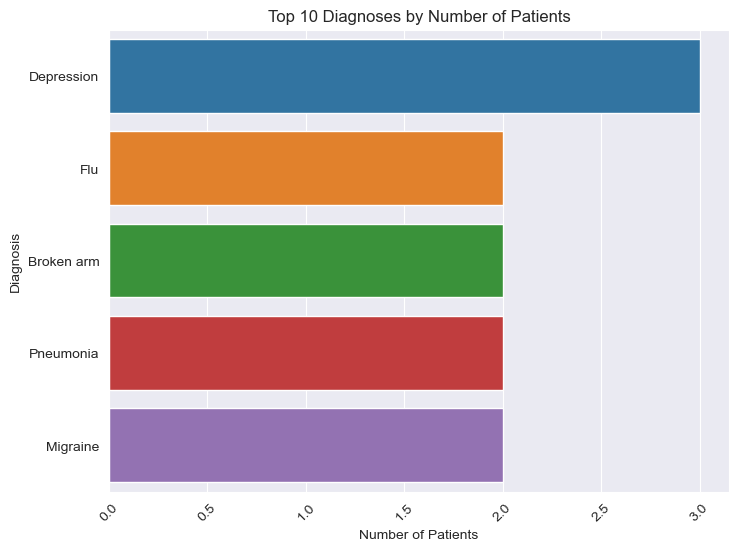

In [53]:

query4 = """
SELECT DIAGNOSIS, 
COUNT(*) AS NUM_PATIENTS 
FROM PATIENT_DIAGNOSE 
GROUP BY DIAGNOSIS 
ORDER BY NUM_PATIENTS DESC LIMIT 5
"""
mycursor.execute(query4)

# Fetching data
data4 = mycursor.fetchall()

# Creating a Pandas DataFrame from the data
df4 = pd.DataFrame(data4, columns=['Diagnosis', 'Number of Patients'])

# Creating a barplot using Seaborn
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')   
sns.barplot(x='Number of Patients', y='Diagnosis', data=df4, orient = 'h')

# Adding labels and title
plt.xlabel('Number of Patients')
plt.ylabel('Diagnosis')
plt.title('Top 10 Diagnoses by Number of Patients')
plt.xticks(rotation=45)


# Displaying plot
plt.show()


### what is the Patient monthly Discharges

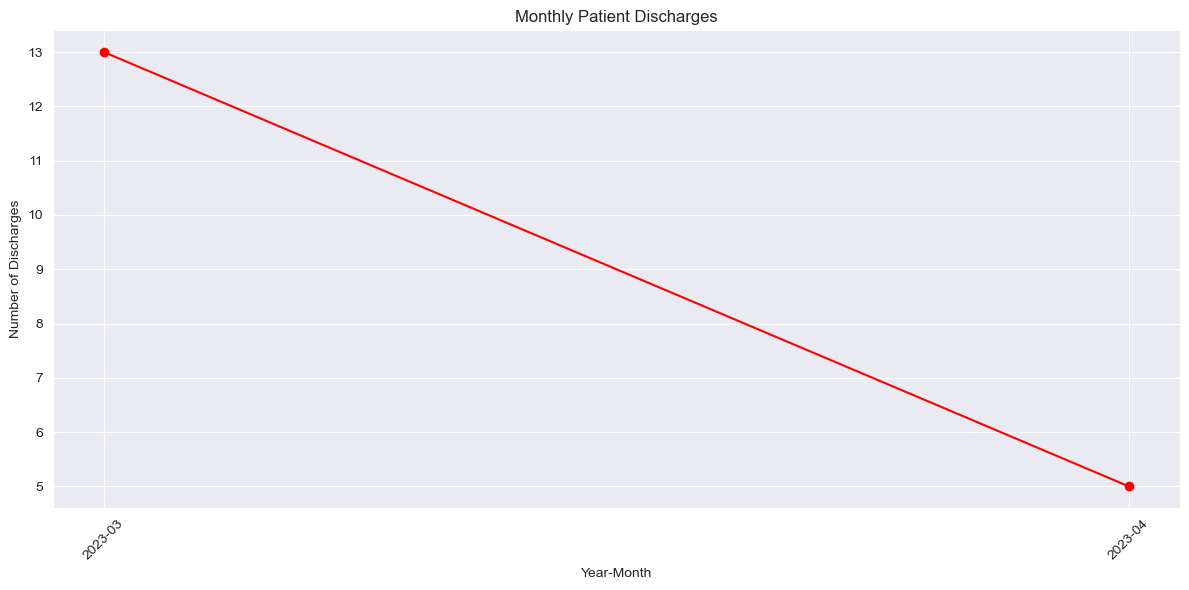

In [52]:

# Define the query
query = "SELECT DISCHARGE_DATE FROM patient_discharge"

# Execute the query
mycursor.execute(query)

# Fetch results
results = mycursor.fetchall()

# Create a pandas dataframe from the results
df = pd.DataFrame(results, columns=["Discharge_Date"])

# Convert date columns to datetime
df['Discharge_Date'] = pd.to_datetime(df['Discharge_Date'])

# Extract year and month from the discharge date
df['Year_Month'] = df['Discharge_Date'].dt.to_period('M')

# Group by year and month, count discharges
discharges_by_month = df.groupby('Year_Month').size()

# Reset index
discharges_by_month = discharges_by_month.reset_index()

# Rename columns
discharges_by_month.columns = ['Year_Month', 'Discharges']

# Convert Year_Month to string
discharges_by_month['Year_Month'] = discharges_by_month['Year_Month'].astype(str)

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(discharges_by_month['Year_Month'], discharges_by_month['Discharges'], marker='o', color='red', linestyle='-')

# Add titles and labels
plt.title('Monthly Patient Discharges')
plt.xlabel('Year-Month')
plt.ylabel('Number of Discharges')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### What is the average  Salary of Doctors?

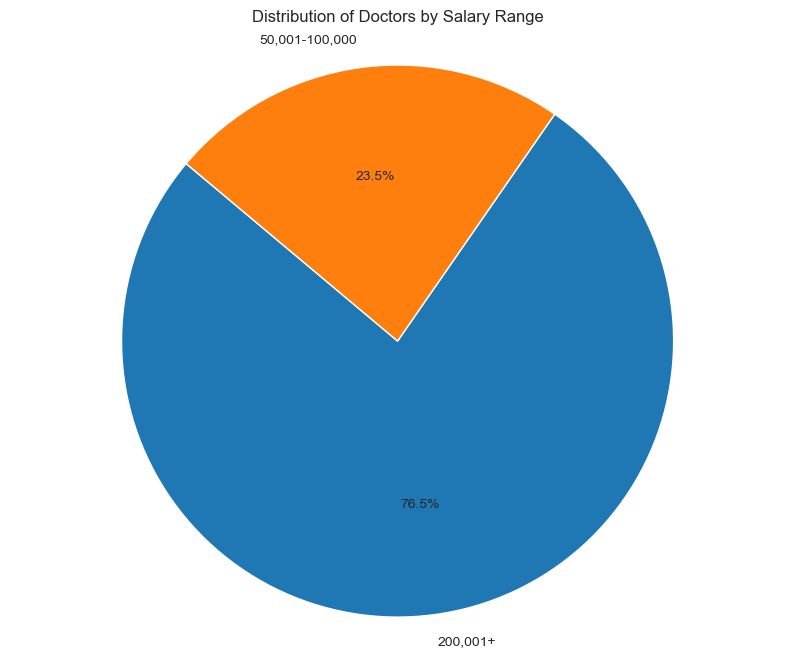

In [37]:
# Define the query
query = """
SELECT 
    CASE 
        WHEN SALARY BETWEEN 0 AND 50000 THEN '0-50,000'
        WHEN SALARY BETWEEN 50001 AND 100000 THEN '50,001-100,000'
        WHEN SALARY BETWEEN 100001 AND 150000 THEN '100,001-150,000'
        WHEN SALARY BETWEEN 150001 AND 200000 THEN '150,001-200,000'
        ELSE '200,001+' 
    END as Salary_Range, 
    COUNT(*) as COUNT 
FROM duty_doc 
GROUP BY Salary_Range
"""

# Execute the query
mycursor.execute(query)

# Fetch results
results = mycursor.fetchall()

# Create a pandas dataframe from the results
df = pd.DataFrame(results, columns=["Salary_Range", "Count"])

# Create the pie chart using matplotlib
plt.figure(figsize=(10,8))
plt.title("Distribution of Doctors by Salary Range")
plt.pie(x=df['Count'], labels=df['Salary_Range'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### What is the relation by Department Location with Department id?

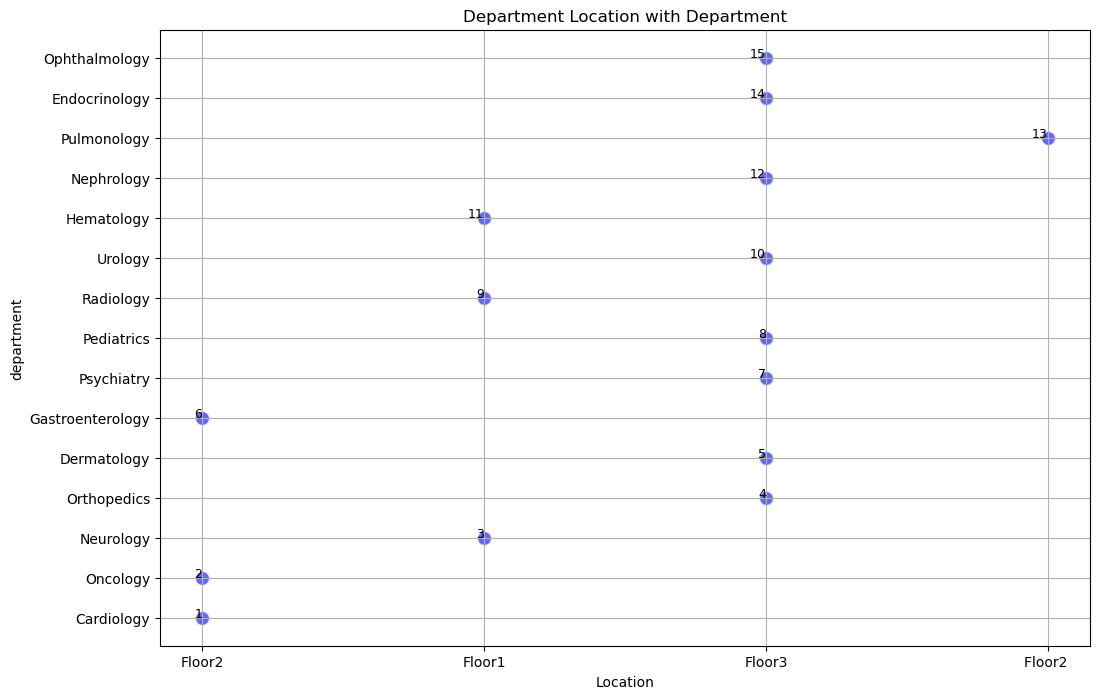

In [41]:
# Define the query
query = """
SELECT DEPT_ID, DEPT_LOCATION, DEPT_NAME
FROM departments
"""

# Execute the query
mycursor.execute(query)

# Fetch results
results = mycursor.fetchall()

# Create a pandas dataframe from the results
df = pd.DataFrame(results, columns=["Dept_Name", "dept_location", "Dept_id"])

# Create the scatter plot using matplotlib
plt.figure(figsize=(12, 8))
plt.scatter(df['dept_location'], df['Dept_id'], color='blue', alpha=0.6, edgecolors='w', s=100)

# Add titles and labels
plt.title('Department Location with Department')
plt.xlabel('Location')
plt.ylabel('department')

# Add labels to each point
for i, txt in enumerate(df['Dept_Name']):
    plt.annotate(txt, (df['dept_location'][i], df['Dept_id'][i]), fontsize=9, ha='right')

plt.grid(True)
plt.show()

### What is the Patient Condition?

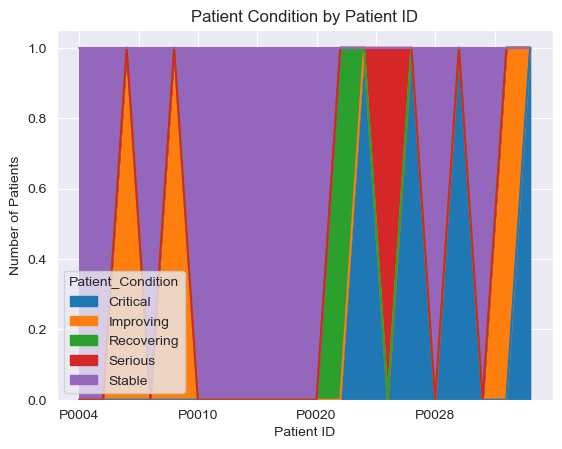

In [55]:

# Execute your SQL query
mycursor.execute("SELECT PATIENT_id, PATIENT_CONDITION FROM patient_operated")

# Fetch all the results
results = mycursor.fetchall()

# Create a DataFrame from the results
patient_data = pd.DataFrame(results, columns=["Patient_ID", "Patient_Condition"])

# Grouping by Patient ID and Patient Condition
grouped_data = patient_data.groupby(['Patient_ID', 'Patient_Condition']).size().unstack(fill_value=0)

# Creating the area plot
grouped_data.plot(kind='area', stacked=True)

# Adding labels and title
plt.xlabel('Patient ID')
plt.ylabel('Number of Patients')
plt.title('Patient Condition by Patient ID')

# Displaying the plot
plt.show()

### what is the Patient monthly admissions

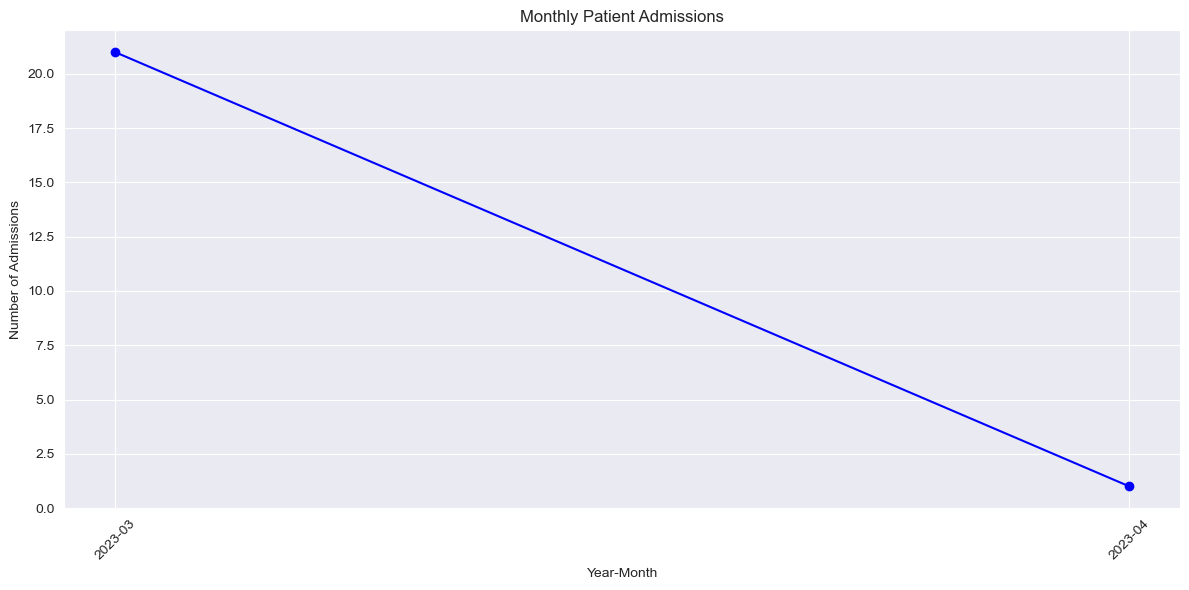

In [50]:
# Define the query
query = "SELECT ADMITTED_DATE FROM patient_admit"

# Execute the query
mycursor.execute(query)

# Fetch results
results = mycursor.fetchall()

# Create a pandas dataframe from the results
df = pd.DataFrame(results, columns=["Admit_Date"])

# Convert date columns to datetime
df['Admit_Date'] = pd.to_datetime(df['Admit_Date'])

# Extract year and month from the admit date
df['Year_Month'] = df['Admit_Date'].dt.to_period('M')

# Group by year and month, count admissions
admissions_by_month = df.groupby('Year_Month').size()

# Reset index
admissions_by_month = admissions_by_month.reset_index()

# Rename columns
admissions_by_month.columns = ['Year_Month', 'Admissions']

# Convert Year_Month to string
admissions_by_month['Year_Month'] = admissions_by_month['Year_Month'].astype(str)

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(admissions_by_month['Year_Month'], admissions_by_month['Admissions'], marker='o', color='blue', linestyle='-')

# Add titles and labels
plt.title('Monthly Patient Admissions')
plt.xlabel('Year-Month')
plt.ylabel('Number of Admissions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### What is the Male to Female Ratio for the patients?

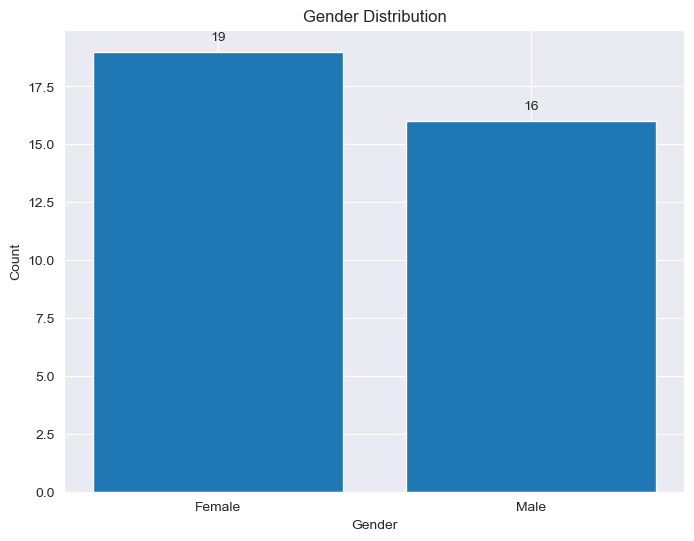

In [48]:
a = mycursor.execute('''SELECT sex, COUNT(*) as count FROM 
    `HospitalManagementSystem`.PATIENT_ENTRY GROUP BY sex;''')

mycursor.execute(a)
myresult = mycursor.fetchall()
df5 = pd.DataFrame(myresult, columns=['gender', 'count'])

plt.figure(figsize=(8, 6))
plt.bar(df5['gender'], df5['count'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add counts above bars
for i, v in enumerate(df5['count']):
    plt.text(i, v + 1/2, str(v), ha='center')

plt.show()

### What was the Payment method used by Patients?

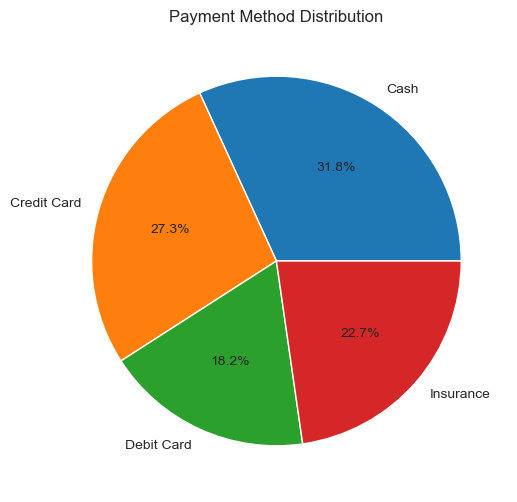

In [20]:
b = mycursor.execute('''SELECT PATIENT_ADMIT.PAYMENT_MODE, COUNT(*) as payment_count
                    FROM `HospitalManagementSystem`.PATIENT_ADMIT
                    GROUP BY PAYMENT_MODE;''')
mycursor.execute(b)
myresult = mycursor.fetchall()
payment = pd.DataFrame(myresult, columns=['payment_mode', 'payment_count'])
payment
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(payment['payment_count'], labels=payment['payment_mode'], autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.show()

In [ ]:
mycursor.close()
mydb.close()

### Conclusion:

The Hospital Management System project provides a robust and user-friendly platform for managing all aspects of hospital operations. By integrating various functionalities into a single system, it streamlines processes, enhances communication, and improves overall efficiency within the healthcare facility.

With features such as patient registration, doctor scheduling, diagnosis and treatment tracking, and financial management, the system offers comprehensive support for hospital staff in delivering high-quality patient care. Additionally, its ability to generate reports and analyze data enables administrators to make informed decisions, optimize resource allocation, and ensure compliance with regulatory standards.

Overall, the Hospital Management System contributes to a more organized, effective, and patient-centered approach to healthcare delivery, ultimately benefiting both healthcare providers and patients alike.